#Configuracion del ambiente

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importacion de bibliotecas


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

Carga del archivo desde Drive

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Google Colab - Data/Alura Challenge/Esencia del Cliente/media prediction and its cost.csv")


In [4]:
df.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


Creamos diccionarios para cambiar las columnas y valores para una mejor comprension

In [5]:
categoria_alimento = {
    'Vegetables': 'Vegetales',
    'Snack Foods': 'Alimentos para picar',
    'Dairy': 'Productos lácteos',
    'Meat': 'Carne',
    'Fruit': 'Fruta',
    'Jams and Jellies': 'Mermeladas y jaleas',
    'Baking Goods': 'Productos para hornear',
    'Breakfast Foods': 'Alimentos para el desayuno',
    'Bread': 'Pan',
    'Canned Soup': 'Sopa enlatada',
    'Beer and Wine': 'Cerveza y vino',
    'Paper Products': 'Productos de papel',
    'Bathroom Products': 'Productos de baño',
    'Electrical': 'Eléctrico',
    'Candy': 'Dulces',
    'Frozen Desserts': 'Postres congelados',
    'Specialty': 'Especialidades',
    'Starchy Foods': 'Alimentos ricos en almidón',
    'Magazines': 'Revistas',
    'Kitchen Products': 'Productos de cocina',
    'Eggs': 'Huevos',
    'Hot Beverages': 'Bebidas calientes',
    'Hygiene': 'Higiene',
    'Pain Relievers': 'Analgésicos',
    'Pizza': 'Pizza',
    'Carbonated Beverages': 'Bebidas carbonatadas',
    'Pure Juice Beverages': 'Bebidas de jugo puro',
    'Cleaning Supplies': 'Suministros de limpieza',
    'Side Dishes': 'Acompañamientos',
    'Frozen Entrees': 'Platos preparados congelados',
    'Drinks': 'Bebidas',
    'Plastic Products': 'Productos de plástico',
    'Hardware': 'Artículos de ferretería',
    'Cold Remedies': 'Remedios para el resfriado',
    'Decongestants': 'Descongestionantes',
    'Canned Tuna': 'Atún enlatado',
    'Seafood': 'Mariscos',
    'Canned Anchovies': 'Anchoas enlatadas',
    'Canned Clams': 'Almejas enlatadas',
    'Candles': 'Velas',
    'Miscellaneous': 'Misceláneos',
    'Canned Oysters': 'Ostras enlatadas',
    'Canned Shrimp': 'Camarones enlatados',
    'Packaged Vegetables': 'Vegetales envasados',
    'Canned Sardines': 'Sardinas enlatadas'
}

departamento = {
    'Produce': 'Productos frescos',
    'Snack Foods': 'Alimentos para picar',
    'Household': 'Artículos para el hogar',
    'Frozen Foods': 'Alimentos congelados',
    'Baking Goods': 'Productos para hornear',
    'Canned Foods': 'Alimentos enlatados',
    'Dairy': 'Productos lácteos',
    'Health and Hygiene': 'Salud e higiene',
    'Beverages': 'Bebidas',
    'Deli': 'Charcutería',
    'Baked Goods': 'Productos horneados',
    'Alcoholic Beverages': 'Bebidas alcohólicas',
    'Snacks': 'Snacks',
    'Starchy Foods': 'Alimentos ricos en almidón',
    'Periodicals': 'Publicaciones periódicas',
    'Eggs': 'Huevos',
    'Breakfast Foods': 'Alimentos para el desayuno',
    'Canned Products': 'Productos enlatados',
    'Checkout': 'Caja de salida',
    'Meat': 'Carne',
    'Seafood': 'Mariscos',
    'Carousel': 'Carrusel'
}

tipo= {'Food':'Comida', 'Non-Consumable':'No comestible', 'Drink':'Bebida'}

promocion = {
    'Weekend Markdown': 'Descuento de fin de semana',
    'Two Day Sale': 'Venta de dos días',
    'Price Savers': 'Ahorro de precios',
    'Price Winners': 'Ganadores de precios',
    'Save-It Sale': 'Venta Ahorra Ya',
    'Super Duper Savers': 'Super Ahorradores',
    'Super Savers': 'Super Ahorro',
    'One Day Sale': 'Venta de un día',
    'Double Down Sale': 'Venta Doble',
    'High Roller Savings': 'Ahorro para apostadores grandes',
    'Green Light Days': 'Días de luz verde',
    'Shelf Clearing Days': 'Días de liquidación de estanterías',
    'Price Slashers': 'Rebajadores de precios',
    'Free For All': 'Gratis para todos',
    'Cash Register Lottery': 'Lotería de la caja registradora',
    'Go For It': 'Adelante',
    'Two for One': 'Dos por uno',
    'Money Savers': 'Ahorradores de dinero',
    'Big Time Discounts': 'Descuentos de gran magnitud',
    'Price Destroyers': 'Destructores de precios',
    'Saving Days': 'Días de ahorro',
    'Dollar Cutters': 'Recortadores de dólares',
    'Unbeatable Price Savers': 'Ahorro de precios imbatible',
    'Sales Galore': 'Promociones por montones',
    'Big Promo': 'Gran promoción',
    'Dimes Off': 'Más barato',
    'Sales Days': 'Días de venta',
    'Price Cutters': 'Rebajando precios',
    'You Save Days': 'Días de ahorro',
    'Savings Galore': 'Ahorros por montones',
    'Bag Stuffers': 'Bolsas llenas',
    'Three for One': 'Tres por uno',
    'I Cant Believe It Sale': 'Venta No Puedo Creerlo',
    'Sale Winners': 'Ganadores de ventas',
    'Pick Your Savings': 'Elige tus ahorros',
    'Bye Bye Baby': 'Adiós bebé',
    'Best Savings': 'Mejores ahorros',
    'Tip Top Savings': 'Ahorro de primera clase',
    'Shelf Emptiers': 'Estantes vacíos',
    'Big Time Savings': 'Ahorro Enorme',
    'Wallet Savers': 'Ahorradores de billetera',
    'Dollar Days': 'Días de dólar',
    'Mystery Sale': 'Venta misteriosa',
    'Price Smashers': 'Aplastadores de precios',
    'Green Light Special': 'Especial luz verde',
    'Coupon Spectacular': 'Espectacular de cupones',
    'Super Wallet Savers': 'Super ahorradores de billetera',
    'Double Your Savings': 'Duplica tus ahorros',
    'Fantastic Discounts': 'Descuentos fantásticos'
}

escolaridad = {
    'Partial High School':'Primaria',
    'High School Degree':'Secundaria',
    'Bachelors Degree':'Superior',
    'Partial College':'Técnico',
    'Graduate Degree':'Maestría'
}

miembro = {
    'Bronze':'Bronce',
    'Golden': 'Oro',
    'Silver':'Plata'
}

ocupacion = {
    'Professional':'Profesional',
    'Skilled Manual':'Técnico',
    'Manual':'Obrero',
    'Management':'Gestión',
    'Clerical':'Cargo de Oficina'
}

pais = {
    'USA':'Estados Unidos',
    'Mexico':'México',
    'Canada':'Canadá'
}

estado_civil = {
    'S':'Soltero', 'M':'Casado'
}

genero ={
    'F':'Femenino',
    'M':'Masculino'
}

vivienda_propia={'Y':'Sí', 'N':'No'}

ingreso_anual={
    '$30K - $50K':40000,
    '$10K - $30K':20000,
    '$50K - $70K':60000,
    '$70K - $90K':80000,
    '$130K - $150K':140000,
    '$90K - $110K':100000,
    '$110K - $130K':120000,
    '$150K +':160000
}



comercio = {
    'Supermarket': 'Supermercado',
    'Deluxe Supermarket': 'Supermercado de lujo',
    'Gourmet Supermarket': 'Supermercado gourmet',
    'Mid-Size Grocery': 'Supermercado mediano',
    'Small Grocery': 'Pequeño supermercado'
}


divulgacion = {
    'Daily Paper, Radio': 'Periódico diario, radio',
    'Product Attachment': 'Anexo del producto',
    'Daily Paper, Radio, TV': 'Periódico diario, radio, televisión',
    'Daily Paper': 'Periódico diario',
    'Street Handout': 'Panfletos',
    'Radio': 'Radio',
    'Sunday Paper': 'Periódico dominical',
    'In-Store Coupon': 'Cupón en la tienda',
    'Sunday Paper, Radio': 'Periódico dominical, radio',
    'Cash Register Handout': 'Entrega en el punto de venta',
    'TV': 'Televisión',
    'Bulk Mail': 'Correo masivo',
    'Sunday Paper, Radio, TV': 'Periódico dominical, radio, televisión'
}

columnas = {
    'food_category': 'categoria_alimento',
    'food_department': 'departamento',
    'food_family': 'tipo',
    'store_sales(in millions)': 'ventas_tienda(en millones)',
    'store_cost(in millions)': 'costo_tienda(en millones)',
    'unit_sales(in millions)': 'ventas_unitarias(en millones)',
    'promotion_name': 'promocion',
    'sales_country': 'pais',
    'marital_status': 'estado_civil',
    'gender': 'genero',
    'total_children': 'total_de_hijos',
    'education': 'escolaridad',
    'member_card': 'miembro',
    'occupation': 'ocupacion',
    'houseowner': 'vivienda_propia',
    'avg_cars_at home(approx)': 'promedio_autos(aprox)',
    'avg. yearly_income': 'ingreso_anual',
    'num_children_at_home': 'numero_hijos',
    'avg_cars_at home(approx).1': 'promedio_autos(aprox)',
    'brand_name': 'marca',
    'SRP': 'precio_recomendado',
    'gross_weight': 'peso_bruto',
    'net_weight': 'peso_neto',
    'recyclable_package': 'empaque_reciclable',
    'low_fat': 'bajo_en_grasa',
    'units_per_case': 'unidades_por_caja',
    'store_type': 'comercio',
    'store_city': 'ciudad',
    'store_state': 'estado',
    'store_sqft': 'pies_cuadrados_tienda',
    'grocery_sqft': 'pies_cuadrados_comestibles',
    'frozen_sqft': 'pies_cuadrados_congelados',
    'meat_sqft': 'pies_cuadrados_carne',
    'coffee_bar': 'cafeteria',
    'video_store': 'tienda_de_videos',
    'salad_bar': 'barra_de_ensaladas',
    'prepared_food': 'comida_preparada',
    'florist': 'floristeria',
    'media_type': 'divulgacion',
    'cost': 'costo'
}

In [6]:
df =  df.rename(columns = columnas)
df.categoria_alimento = df.categoria_alimento.map(categoria_alimento)
df.departamento = df.departamento.map(departamento)
df.tipo = df.tipo.map(tipo)
df.promocion = df.promocion.map(promocion)
df.escolaridad = df.escolaridad.map(escolaridad)
df.miembro = df.miembro.map(miembro)
df.ocupacion = df.ocupacion.map(ocupacion)
df.pais = df.pais.map(pais)
df.estado_civil = df.estado_civil.map(estado_civil)
df.genero = df.genero.map(genero)
df.vivienda_propia = df.vivienda_propia.map(vivienda_propia)
df.ingreso_anual = df.ingreso_anual.map(ingreso_anual)
df.comercio = df.comercio.map(comercio)
df.divulgacion = df.divulgacion.map(divulgacion)


In [7]:
df.head(5)

,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),promocion,pais,estado_civil,genero,...,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,divulgacion,costo
0,Alimentos para el desayuno,Alimentos congelados,Comida,7.36,2.7232,4.0,Bolsas llenas,Estados Unidos,Casado,Femenino,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",126.62
1,Alimentos para el desayuno,Alimentos congelados,Comida,5.52,2.5944,3.0,Lotería de la caja registradora,Estados Unidos,Casado,Masculino,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",59.86
2,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,1.3616,2.0,Ahorro para apostadores grandes,Estados Unidos,Soltero,Femenino,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",84.16
3,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,1.1776,2.0,Lotería de la caja registradora,Estados Unidos,Casado,Femenino,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Cupón en la tienda,95.78
4,Alimentos para el desayuno,Alimentos congelados,Comida,4.08,1.4280,3.0,Venta Doble,Estados Unidos,Casado,Masculino,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


Exportamos el DataFrame mas legible para trabajarlo a futuro nuevamente


In [8]:
df.to_csv("/content/drive/MyDrive/Google Colab - Data/Alura Challenge/Esencia del Cliente/Prediccion_costos.csv", sep=";", index = False)

#Analisis exploratorio de los datos

In [9]:
pd.set_option("display.max_columns", None)
df.head(5)

,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),promocion,pais,estado_civil,genero,total_de_hijos,escolaridad,miembro,ocupacion,vivienda_propia,promedio_autos(aprox),ingreso_anual,numero_hijos,promedio_autos(aprox),marca,precio_recomendado,peso_bruto,peso_neto,empaque_reciclable,bajo_en_grasa,unidades_por_caja,comercio,ciudad,estado,pies_cuadrados_tienda,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,divulgacion,costo
0,Alimentos para el desayuno,Alimentos congelados,Comida,7.36,2.7232,4.0,Bolsas llenas,Estados Unidos,Casado,Femenino,1.0,Primaria,NaN,Técnico,Sí,1.0,20000,1.0,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",126.62
1,Alimentos para el desayuno,Alimentos congelados,Comida,5.52,2.5944,3.0,Lotería de la caja registradora,Estados Unidos,Casado,Masculino,0.0,Superior,Plata,Profesional,Sí,4.0,60000,0.0,4.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",59.86
2,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,1.3616,2.0,Ahorro para apostadores grandes,Estados Unidos,Soltero,Femenino,4.0,Primaria,NaN,Obrero,No,1.0,20000,0.0,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",84.16
3,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,1.1776,2.0,Lotería de la caja registradora,Estados Unidos,Casado,Femenino,2.0,Secundaria,Bronce,Obrero,Sí,2.0,40000,2.0,2.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Cupón en la tienda,95.78
4,Alimentos para el desayuno,Alimentos congelados,Comida,4.08,1.4280,3.0,Venta Doble,Estados Unidos,Casado,Masculino,0.0,Primaria,Bronce,Técnico,No,2.0,40000,0.0,2.0,Golden,1.36,7.12,5.11,0.0,1.0,29.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


In [10]:
df.miembro.fillna("No", inplace = True)

##Correlacion entre variables

<ipython-input-11-3a743ab0f5f7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_corr = df.corr()


(24.5, -0.5)

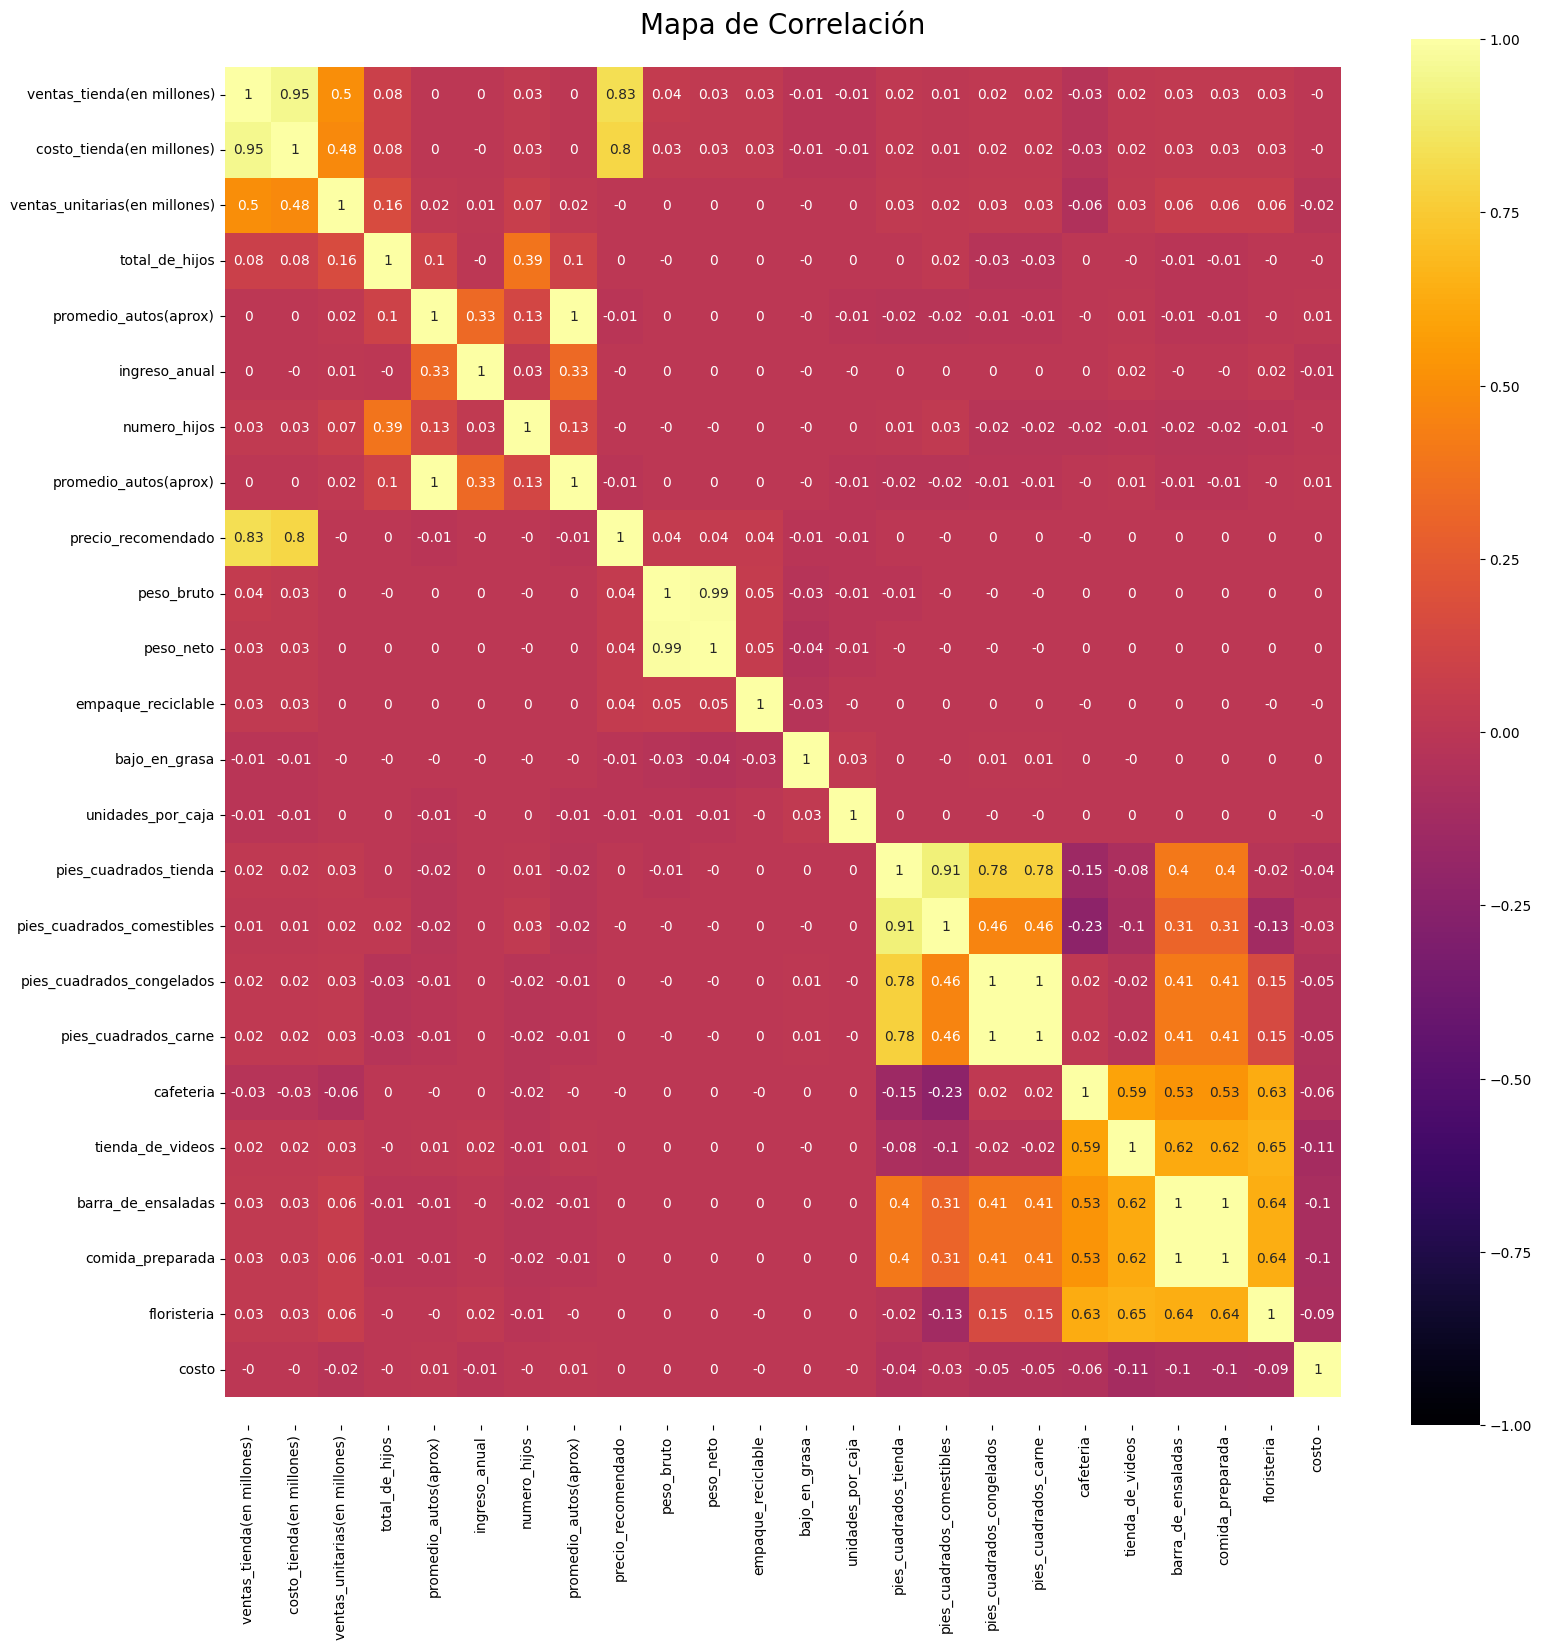

In [11]:
data_corr = df.corr()
plt.figure(figsize=(18, 18))
heatmap = sns.heatmap(data_corr.round(2), vmin=-1, vmax=1, annot=True, cmap = "inferno")
heatmap.set_title('Mapa de Correlación', fontsize = 20, pad=1)


bottom, top = heatmap.get_ylim()
heatmap.set_ylim(bottom + 0.5, top - 0.5)

##Ingresos anuales por persona

###Ingresos anuales segun su membresia

Podemos notar como la gran mayoria de personas con los ingresos anuales mas bajos, son los que no tienen membresia, ademas notamos que el grupo bronce esta fuertemente conformado por personas de las siguientes dos categorias de ingresos anuales

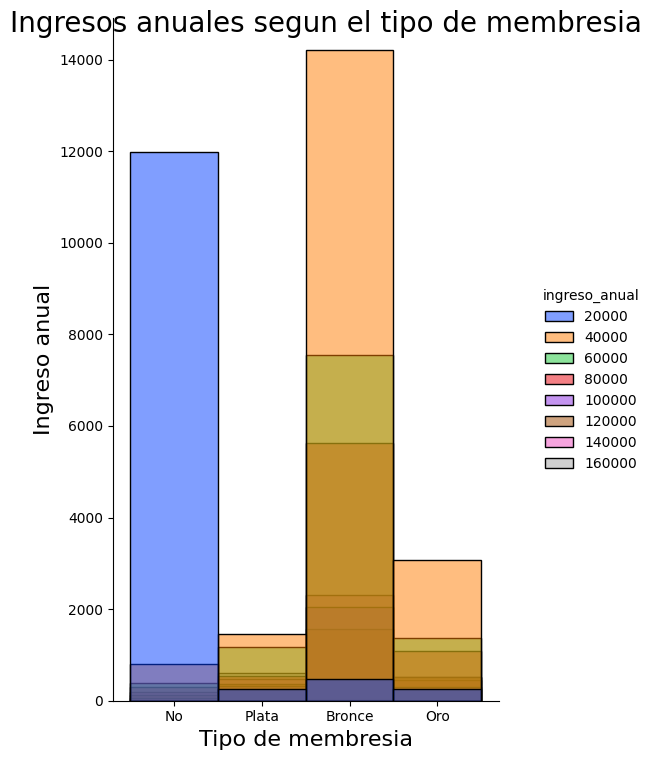

In [12]:
ax = sns.displot(data = df, x = "miembro", hue = "ingreso_anual", palette = "bright")
ax.figure.set_size_inches(6,8)
ax.fig.suptitle("Ingresos anuales segun el tipo de membresia", fontsize=20)
ax.set_ylabels("Ingreso anual", fontsize = 16)
ax.set_xlabels("Tipo de membresia", fontsize = 16)
ax = ax

###Ingresos anuales segun el pais


Podemos darnos cuenta que la media por persona por pais, es practicamente la misma, pero si cambia en la cantidad de ingresos por pais

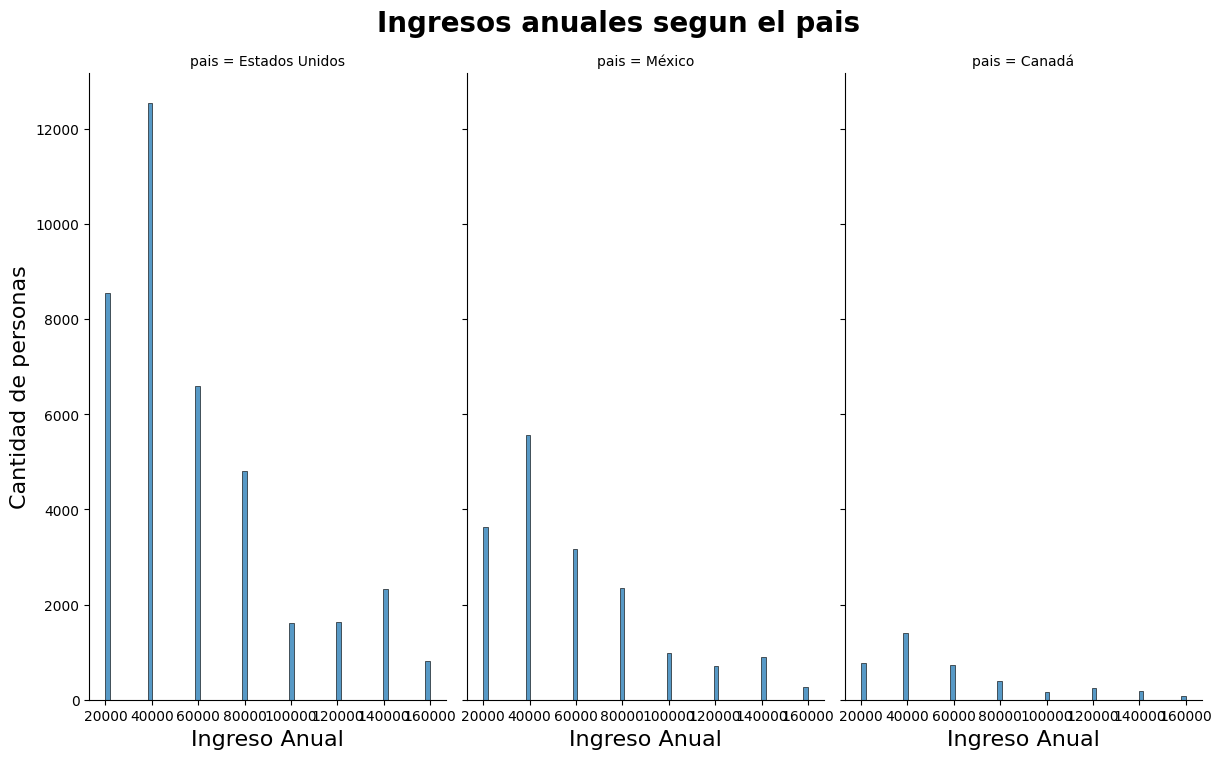

In [13]:
ax = sns.displot(data = df, x = "ingreso_anual", col = "pais")
ax.figure.set_size_inches(12,8)
ax.fig.suptitle("Ingresos anuales segun el pais", fontsize = 20, fontweight= 'bold')
ax.fig.subplots_adjust(top = 0.9)
ax.set_ylabels("Cantidad de personas", fontsize = 16)
ax.set_xlabels("Ingreso Anual", fontsize = 16)
ax = ax

In [14]:
ingresos_pais = df.groupby("pais")["ingreso_anual"].sum()
print(f"La gente de Estados Unidos tiene unos ingresos totales por un valor de ${ingresos_pais[1]/1000000} millones de dolares, mientras de México es de ${ingresos_pais[2]/1000000} millones de dolares, y Canada con ${ingresos_pais[0]/1000000} millones de dolares")

La gente de Estados Unidos tiene unos ingresos totales por un valor de $2267.76 millones de dolares, mientras de México es de $1026.04 millones de dolares, y Canada con $229.9 millones de dolares


In [15]:
ingresos_pais_media = df.groupby("pais")["ingreso_anual"].mean()
print(f"Los estadosunidenses tiene una media de ingresos de ${round(ingresos_pais_media[1],1)}, mientras los mexicanos es de ${round(ingresos_pais_media[2],1)}, y canadienses con ${round(ingresos_pais_media[0],1)}")

Los estadosunidenses tiene una media de ingresos de $58309.2, mientras los mexicanos es de $58390.6, y canadienses con $57997.0


###Ingresos anuales segun la cantidad de hijos

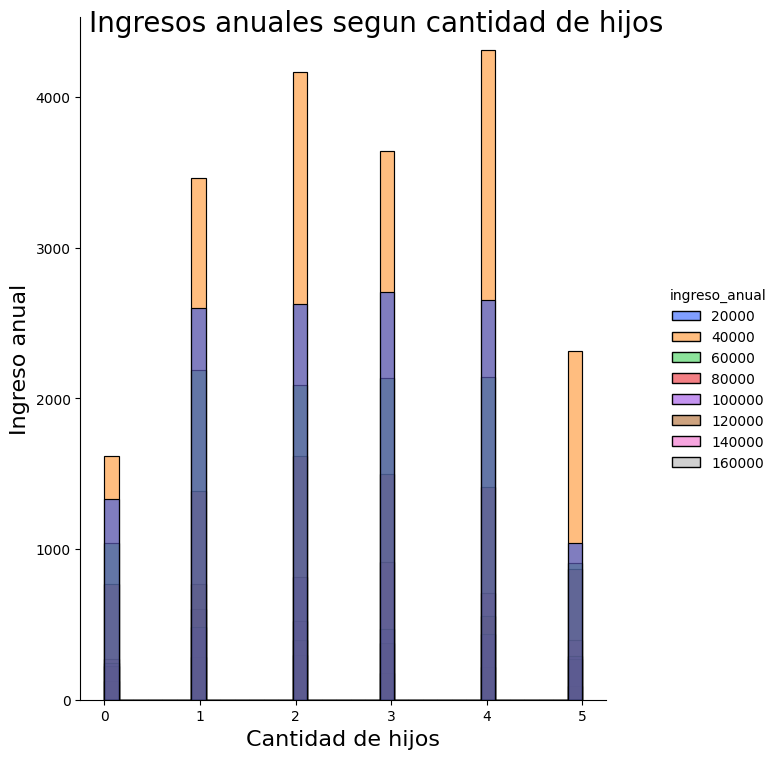

In [16]:
ax = sns.displot(data = df, x = "total_de_hijos", hue = "ingreso_anual", palette = "bright")
ax.figure.set_size_inches(8,8)
ax.fig.suptitle("Ingresos anuales segun cantidad de hijos", fontsize=20)
ax.set_ylabels("Ingreso anual", fontsize = 16)
ax.set_xlabels("Cantidad de hijos", fontsize = 16)
ax = ax

In [17]:
categorias_mas_compradas = df.categoria_alimento.value_counts()[:5].index
mas_comprados = pd.DataFrame()
for x in categorias_mas_compradas:
    #query = f"categoria_alimento == '{x}'"
    mas_comprados = pd.concat([mas_comprados, df.query(f"categoria_alimento == '{x}'")])

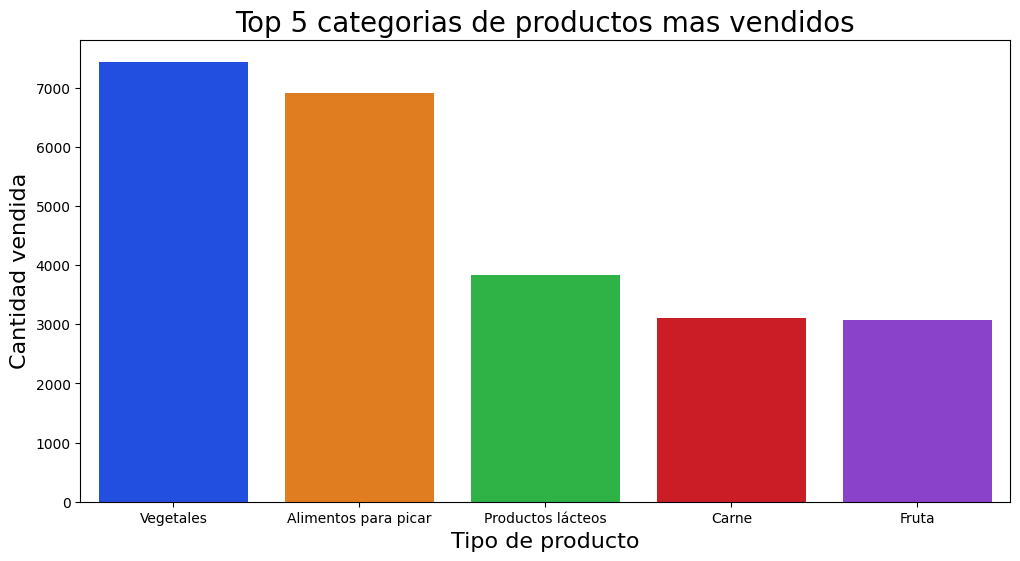

In [18]:
ax = sns.countplot(data = mas_comprados, x = "categoria_alimento", palette = "bright", orient = "h")
ax.figure.set_size_inches(12,6)
ax.set_title("Top 5 categorias de productos mas vendidos", fontsize=20)
ax.set_ylabel("Cantidad vendida", fontsize = 16)
ax.set_xlabel("Tipo de producto", fontsize = 16)
ax = ax

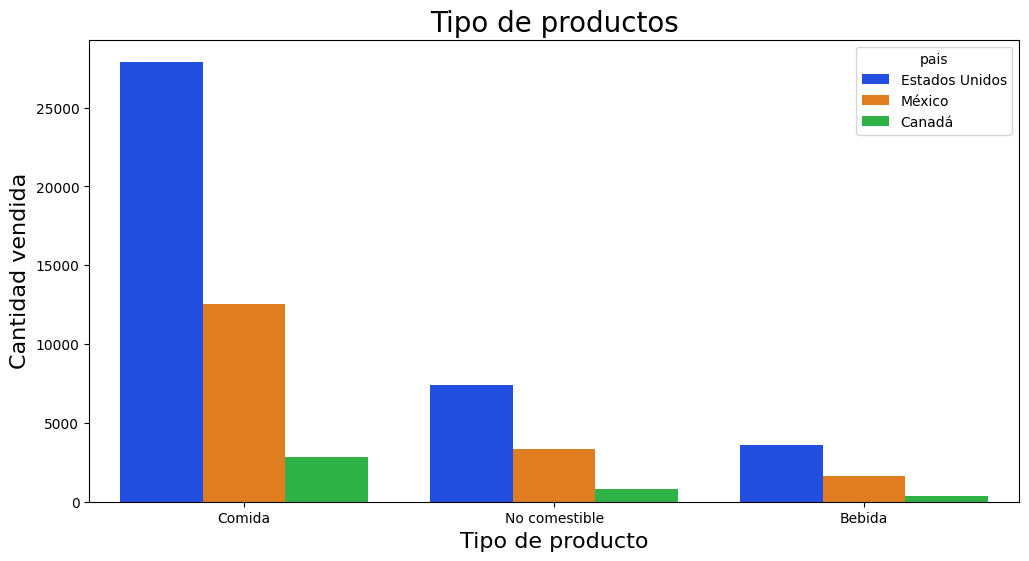

In [19]:
ax = sns.countplot(data = df, x = "tipo",hue = "pais", palette = "bright", orient = "h")
ax.figure.set_size_inches(12,6)
ax.set_title("Tipo de productos", fontsize=20)
ax.set_ylabel("Cantidad vendida", fontsize = 16)
ax.set_xlabel("Tipo de producto", fontsize = 16)
ax = ax

###Ingresos anuales segun el género

Notamos que no hay una diferencia notable entre los ingresos segune lgenero de la persona

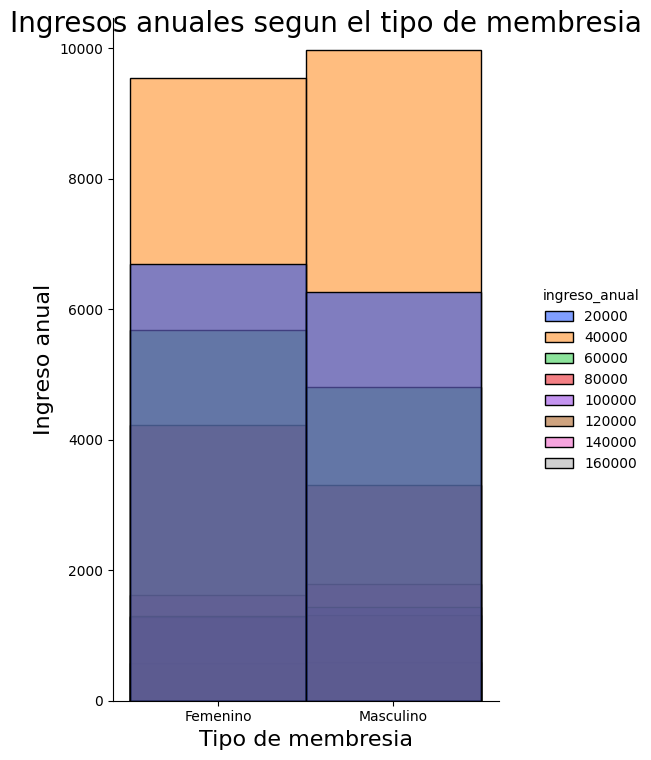

In [20]:
ax = sns.displot(data = df, x = "genero",  hue = "ingreso_anual", palette = "bright")
ax.figure.set_size_inches(6,8)
ax.fig.suptitle("Ingresos anuales segun el tipo de membresia", fontsize=20)
ax.set_ylabels("Ingreso anual", fontsize = 16)
ax.set_xlabels("Tipo de membresia", fontsize = 16)
ax = ax

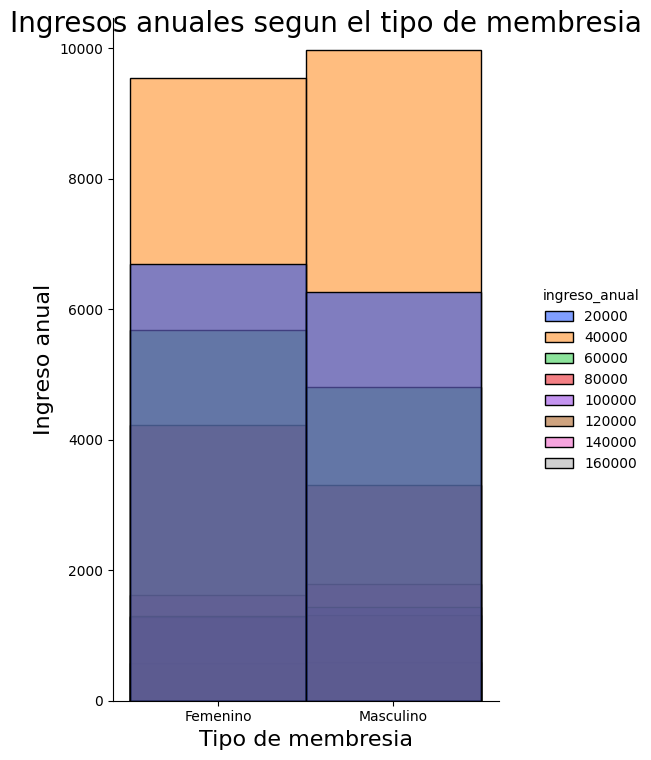

In [21]:
ax = sns.displot(data = df, x = "genero", hue = "ingreso_anual", palette = "bright")
ax.figure.set_size_inches(6,8)
ax.fig.suptitle("Ingresos anuales segun el tipo de membresia", fontsize=20)
ax.set_ylabels("Ingreso anual", fontsize = 16)
ax.set_xlabels("Tipo de membresia", fontsize = 16)
ax = ax

#Preprocesamiento y Obtención de Features

In [22]:
pd.set_option("display.max_columns", None)
df.head(5)


,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),promocion,pais,estado_civil,genero,total_de_hijos,escolaridad,miembro,ocupacion,vivienda_propia,promedio_autos(aprox),ingreso_anual,numero_hijos,promedio_autos(aprox),marca,precio_recomendado,peso_bruto,peso_neto,empaque_reciclable,bajo_en_grasa,unidades_por_caja,comercio,ciudad,estado,pies_cuadrados_tienda,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,divulgacion,costo
0,Alimentos para el desayuno,Alimentos congelados,Comida,7.36,2.7232,4.0,Bolsas llenas,Estados Unidos,Casado,Femenino,1.0,Primaria,No,Técnico,Sí,1.0,20000,1.0,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",126.62
1,Alimentos para el desayuno,Alimentos congelados,Comida,5.52,2.5944,3.0,Lotería de la caja registradora,Estados Unidos,Casado,Masculino,0.0,Superior,Plata,Profesional,Sí,4.0,60000,0.0,4.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",59.86
2,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,1.3616,2.0,Ahorro para apostadores grandes,Estados Unidos,Soltero,Femenino,4.0,Primaria,No,Obrero,No,1.0,20000,0.0,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",84.16
3,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,1.1776,2.0,Lotería de la caja registradora,Estados Unidos,Casado,Femenino,2.0,Secundaria,Bronce,Obrero,Sí,2.0,40000,2.0,2.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Cupón en la tienda,95.78
4,Alimentos para el desayuno,Alimentos congelados,Comida,4.08,1.4280,3.0,Venta Doble,Estados Unidos,Casado,Masculino,0.0,Primaria,Bronce,Técnico,No,2.0,40000,0.0,2.0,Golden,1.36,7.12,5.11,0.0,1.0,29.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


In [23]:
df.categoria_alimento.unique()

array(['Alimentos para el desayuno', 'Pan', 'Camarones enlatados',
       'Productos para hornear', 'Vegetales', 'Postres congelados',
       'Dulces', 'Alimentos para picar', 'Productos lácteos',
       'Alimentos ricos en almidón', 'Suministros de limpieza',
       'Descongestionantes', 'Carne', 'Bebidas calientes',
       'Mermeladas y jaleas', 'Bebidas carbonatadas', 'Mariscos',
       'Especialidades', 'Productos de cocina', 'Eléctrico',
       'Cerveza y vino', 'Velas', 'Fruta', 'Bebidas de jugo puro',
       'Sopa enlatada', 'Productos de papel', 'Atún enlatado', 'Huevos',
       'Artículos de ferretería', 'Sardinas enlatadas',
       'Almejas enlatadas', 'Analgésicos', 'Acompañamientos',
       'Productos de baño', 'Revistas', 'Platos preparados congelados',
       'Pizza', 'Remedios para el resfriado', 'Anchoas enlatadas',
       'Bebidas', 'Higiene', 'Productos de plástico', 'Ostras enlatadas',
       'Vegetales envasados', 'Misceláneos'], dtype=object)

In [24]:
df.departamento.unique()

array(['Alimentos congelados', 'Productos horneados',
       'Alimentos enlatados', 'Productos para hornear',
       'Productos frescos', 'Snacks', 'Alimentos para picar',
       'Productos lácteos', 'Alimentos ricos en almidón',
       'Artículos para el hogar', 'Salud e higiene', 'Carne', 'Bebidas',
       'Mariscos', 'Charcutería', 'Bebidas alcohólicas',
       'Productos enlatados', 'Huevos', 'Publicaciones periódicas',
       'Alimentos para el desayuno', 'Caja de salida', 'Carrusel'],
      dtype=object)

In [25]:
df.tipo.unique()

array(['Comida', 'No comestible', 'Bebida'], dtype=object)

In [26]:
df.escolaridad.unique()

array(['Primaria', 'Superior', 'Secundaria', 'Maestría', 'Técnico'],
      dtype=object)

In [27]:
df.columns

Index(['categoria_alimento', 'departamento', 'tipo',
       'ventas_tienda(en millones)', 'costo_tienda(en millones)',
       'ventas_unitarias(en millones)', 'promocion', 'pais', 'estado_civil',
       'genero', 'total_de_hijos', 'escolaridad', 'miembro', 'ocupacion',
       'vivienda_propia', 'promedio_autos(aprox)', 'ingreso_anual',
       'numero_hijos', 'promedio_autos(aprox)', 'marca', 'precio_recomendado',
       'peso_bruto', 'peso_neto', 'empaque_reciclable', 'bajo_en_grasa',
       'unidades_por_caja', 'comercio', 'ciudad', 'estado',
       'pies_cuadrados_tienda', 'pies_cuadrados_comestibles',
       'pies_cuadrados_congelados', 'pies_cuadrados_carne', 'cafeteria',
       'tienda_de_videos', 'barra_de_ensaladas', 'comida_preparada',
       'floristeria', 'divulgacion', 'costo'],
      dtype='object')

##Codificando variables categoricas a numericas


In [28]:
dic = {"tipo", "escolaridad", "total_de_hijos", "miembro", "costo", "ingreso_anual", "comercio", "genero",  "estado_civil", "pais", "ocupacion", "ciudad" }
df_nuevo = df.loc[:,dic]
df_nuevo

<ipython-input-28-72919e53ef6e>:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_nuevo = df.loc[:,dic]


,costo,estado_civil,ocupacion,miembro,total_de_hijos,comercio,ciudad,genero,ingreso_anual,escolaridad,pais,tipo
0,126.62,Casado,Técnico,No,1.0,Supermercado de lujo,Salem,Femenino,20000,Primaria,Estados Unidos,Comida
1,59.86,Casado,Profesional,Plata,0.0,Supermercado de lujo,Salem,Masculino,60000,Superior,Estados Unidos,Comida
2,84.16,Soltero,Obrero,No,4.0,Supermercado de lujo,Salem,Femenino,20000,Primaria,Estados Unidos,Comida
3,95.78,Casado,Obrero,Bronce,2.0,Supermercado de lujo,Salem,Femenino,40000,Secundaria,Estados Unidos,Comida
4,50.79,Casado,Técnico,Bronce,0.0,Supermercado de lujo,Salem,Masculino,40000,Primaria,Estados Unidos,Comida
...,...,...,...,...,...,...,...,...,...,...,...,...
60423,95.25,Casado,Técnico,No,1.0,Pequeño supermercado,San Francisco,Femenino,20000,Primaria,Estados Unidos,No comestible
60424,69.42,Soltero,Técnico,Bronce,2.0,Pequeño supermercado,San Francisco,Femenino,40000,Secundaria,Estados Unidos,No comestible
60425,67.51,Casado,Obrero,Bronce,1.0,Pequeño supermercado,San Francisco,Masculino,40000,Secundaria,Estados Unidos,No comestible
60426,132.88,Soltero,Profesional,Bronce,2.0,Supermercado mediano,Victoria,Masculino,80000,Superior,Canadá,No comestible


In [29]:
df.genero.unique()

array(['Femenino', 'Masculino'], dtype=object)

In [30]:
def numerar(x):
  dic = {}
  numero = 0
  for i in x.unique():
    dic[i] = numero
    numero = numero +1
  return dic

def cambio(nombre_columna, nombre_lista):
    df_nuevo[nombre_columna] = df_nuevo[nombre_columna].map(nombre_lista)

In [31]:
#Se crean todos los diccionarios para el cambio de la variables categoricas

comercios = {'Supermercado de lujo': 4,
            'Supermercado': 2,
            'Supermercado gourmet': 3,
            'Pequeño supermercado': 0,
            'Supermercado mediano': 1
            }
escolaridades = {'Primaria': 0,
            'Superior': 2,
            'Secundaria': 1,
            'Maestría': 4,
            'Técnico': 3}
miembros = {'No': 0,
           'Plata': 2,
           'Bronce': 1,
           'Oro' : 3
          }
generos = {'Femenino' : 1,
         'Masculino' : 0
         }
estado_civil = {'Casado' : 1,
             'Soltero' : 0
                }
ciudades = numerar(df.ciudad)
tipos = numerar(df.tipo)
ocupaciones = numerar(df.ocupacion)
paises = numerar(df.pais)

In [32]:
#Mapeo de DataFrame con los nuevos valores numericos
cambio("comercio", comercios)
cambio("miembro", miembros)
cambio("genero", generos)
cambio("ciudad", ciudades)
cambio("tipo", tipos)
cambio("ocupacion", ocupaciones)
cambio("pais", paises)
cambio("estado_civil", estado_civil)
cambio("escolaridad", escolaridades)


In [33]:
df_nuevo.head()

,costo,estado_civil,ocupacion,miembro,total_de_hijos,comercio,ciudad,genero,ingreso_anual,escolaridad,pais,tipo
0,126.62,1,0,0,1.0,4,0,1,20000,0,0,0
1,59.86,1,1,2,0.0,4,0,0,60000,2,0,0
2,84.16,0,2,0,4.0,4,0,1,20000,0,0,0
3,95.78,1,2,1,2.0,4,0,1,40000,1,0,0
4,50.79,1,0,1,0.0,4,0,0,40000,0,0,0


##Estandarización

In [34]:
#Plantamos una semilla de aleatoriedad
SEED = 247
np.random.seed(SEED)

In [35]:
#Realizamos la estandarizacion de los datos con el metodo Normalizer
x_std = Normalizer().fit_transform(df_nuevo.values)
x_std

array([[6.33087298e-03, 4.99989968e-05, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.97666167e-04, 1.66666583e-05, 1.66666583e-05, ...,
        3.33333166e-05, 0.00000000e+00, 0.00000000e+00],
       [4.20796255e-03, 0.00000000e+00, 9.99991100e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.68774744e-03, 2.49999621e-05, 4.99999241e-05, ...,
        2.49999621e-05, 0.00000000e+00, 2.49999621e-05],
       [1.66099766e-03, 0.00000000e+00, 1.24999824e-05, ...,
        2.49999648e-05, 2.49999648e-05, 1.24999824e-05],
       [4.38795586e-03, 0.00000000e+00, 9.99989942e-05, ...,
        0.00000000e+00, 9.99989942e-05, 4.99994971e-05]])

#Clusterizacion

Restricciones: (El puntaje mínimo de Silhouette debe ser de 0.50; el de Davies-Bouldin máximo de 0.75; y el de CalinskiHarabasz, el número más alto posible.)

In [36]:
def calcular_inercia(datos):
    #Inicializamos las listas
    index = []
    inercia = []
    silhouette = []
    davies_bouldin = []
    calinski_harabasz = []

    #Hacemos el recorrido de 3 a 10 clusters calculando su KMeans en cada recorrido
    for i in range(3,11):
      #Realizamos la prediccion del Kmeans
      clusterer = KMeans(n_clusters= i, n_init = 10)
      clusterer.fit(X = datos)
      preds = clusterer.fit_predict(datos)

      #Almacenamos los coeficientes en sus respectivos arrays
      index.append(i)
      inercia.append(clusterer.inertia_)
      silhouette.append(metrics.silhouette_score(datos, preds))
      davies_bouldin.append(metrics.davies_bouldin_score(datos, preds))
      calinski_harabasz.append(metrics.calinski_harabasz_score(datos, preds))
      print(f"Cluster {i}/10 analizado...")

    #Generamos el DataFrame con los coeficientes calculados
    df_coeficientes = pd.DataFrame({"Inercia": inercia, "Silhouette": silhouette, "Davies Bouldin": davies_bouldin, "Calinski Harabasz": calinski_harabasz})
    df_coeficientes.index = index
    df_coeficientes = df_coeficientes.rename_axis("Cantidad clusters:")

    #Devolvemos el DataFrame cargado con los datos
    return [df_coeficientes]


In [37]:
df_inercia = calcular_inercia(x_std)

Cluster 3/10 analizado...
Cluster 4/10 analizado...
Cluster 5/10 analizado...
Cluster 6/10 analizado...
Cluster 7/10 analizado...
Cluster 8/10 analizado...
Cluster 9/10 analizado...
Cluster 10/10 analizado...


El standar minimo que se da sera que:

El puntaje mínimo de Silhouette debe ser de 0.50; el de Davies-Bouldin máximo de 0.75; y el de CalinskiHarabasz, el número más alto posible.


In [38]:
df_inercia[0]

,Inercia,Silhouette,Davies Bouldin,Calinski Harabasz
Cantidad clusters:,,,,
3,0.021297,0.603676,0.513174,216905.343478
4,0.013579,0.536749,0.548500,238233.497698
5,0.009208,0.527153,0.584103,270650.173776
6,0.006416,0.516119,0.588231,315996.842984
7,0.005392,0.504704,0.637022,315272.841367
8,0.004512,0.464227,0.675088,324564.639284
9,0.003873,0.443889,0.722297,332152.406486
10,0.003450,0.438542,0.761200,332208.025585


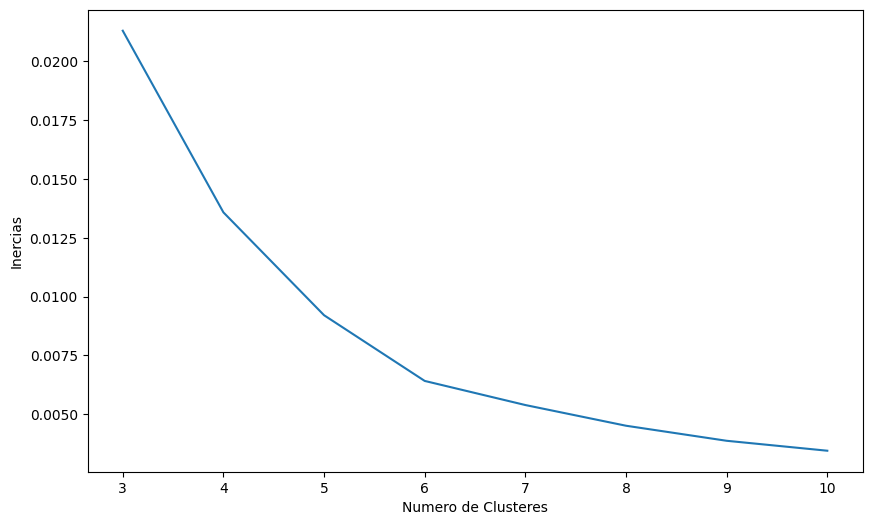

In [39]:
plt.figure(figsize = (10,6))
plt.plot(df_inercia[0]["Inercia"])
plt.xlabel('Numero de Clusteres')
plt.ylabel('Inercias')

plt.show()

El DataFrame y la inercia nos muentra que siguiendo la base de minimos y maximos, nuestra cantidad de clusters ideal serian **6**

In [40]:
#Conocemos las dimenciones de nuestro x_std
x_std.shape

(60428, 12)

In [42]:
#Generamos los datos aleatorios con las dimenciones correspondiente
random_data = np.random.rand(60428,12)

#Calculamos la inercia del random
df_random = calcular_inercia(random_data)

Cluster 3/10 analizado...
Cluster 4/10 analizado...
Cluster 5/10 analizado...
Cluster 6/10 analizado...
Cluster 7/10 analizado...
Cluster 8/10 analizado...
Cluster 9/10 analizado...
Cluster 10/10 analizado...


In [43]:
df_random[0]

,Inercia,Silhouette,Davies Bouldin,Calinski Harabasz
Cantidad clusters:,,,,
3,54340.374704,0.053104,3.422963,3407.423961
4,52497.125068,0.053448,3.345119,3058.493117
5,51111.549596,0.052596,2.998109,2765.518769
6,49946.080025,0.052065,2.831857,2545.991438
7,48865.570794,0.052746,2.716254,2391.200290
8,47928.758231,0.053598,2.589278,2258.333483
9,47081.051397,0.053050,2.527591,2147.575789
10,46324.541503,0.053126,2.460509,2049.727824


In [44]:
set1, set2, set3, set4, set5 = np.array_split(x_std, 5)
sets = [set1, set2, set3, set4, set5]

In [45]:
#Inicializamos las listas
set_n = []
n = 1
inercia = []
silhouette = []
davies_bouldin = []
calinski_harabasz = []

for s in sets:
  #Realizamos la prediccion del Kmeans
  clusterer = KMeans(n_clusters= 6, n_init = 10)
  clusterer.fit(X = s)
  preds = clusterer.fit_predict(s)

  #Almacenamos los coeficientes en sus respectivos arrays
  set_n.append(n)
  inercia.append(clusterer.inertia_)
  silhouette.append(metrics.silhouette_score(s, preds))
  davies_bouldin.append(metrics.davies_bouldin_score(s, preds))
  calinski_harabasz.append(metrics.calinski_harabasz_score(s, preds))
  print(f"Set {n}/{len(sets)} analizado...")
  n +=1

#Generamos el DataFrame con los coeficientes calculados
df_coeficientes = pd.DataFrame({"Set": set_n, "Inercia": inercia, "Silhouette": silhouette, "Davies Bouldin": davies_bouldin, "Calinski Harabasz": calinski_harabasz})


Set 1/5 analizado...
Set 2/5 analizado...
Set 3/5 analizado...
Set 4/5 analizado...
Set 5/5 analizado...


In [46]:
df_coeficientes

,Set,Inercia,Silhouette,Davies Bouldin,Calinski Harabasz
0,1,0.001249,0.523626,0.575566,65803.586849
1,2,0.001309,0.509959,0.594863,61955.726660
2,3,0.001282,0.516146,0.588676,62936.039289
3,4,0.001299,0.515818,0.589611,62795.323255
4,5,0.001268,0.516915,0.588698,62880.893265


In [47]:
#Realizamos la prediccion del Kmeans
clusterer = KMeans(n_clusters= 6)
clusterer.fit(X = x_std)
df_nuevo["Clusters"] = clusterer.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#Descripción de los Clusters

In [48]:
df_nuevo.Clusters.unique()

array([2, 3, 0, 5, 1, 4], dtype=int32)

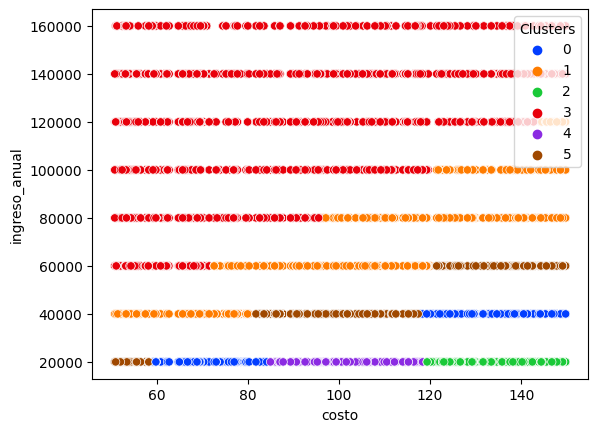

In [49]:
sns.scatterplot(data=df_nuevo, x="costo", y= "ingreso_anual", hue="Clusters", palette= "bright");

In [50]:
df_nuevo.groupby("Clusters").describe()

costo                                                         \
            count        mean        std     min     25%     50%     75%   
Clusters                                                                   
0          9603.0  112.491441  32.082632   59.02   75.76  126.62  139.19   
1         15710.0   92.474483  29.064305   50.79   67.25   89.90  115.25   
2          4122.0  135.579888   8.509654  119.26  128.20  137.46  142.58   
3         15264.0   83.385394  26.281599   50.79   62.26   76.88   98.81   
4          4094.0  101.694069   9.789542   84.97   93.11  101.84  109.21   
5         11635.0  104.615930  26.209976   50.79   90.65  104.41  125.48   

                 estado_civil                                               \
             max        count      mean       std  min  25%  50%  75%  max   
Clusters                                                                     
0         149.75       9603.0  0.496095  0.500011  0.0  0.0  0.0  1.0  1.0   
1         149.75      15710.0  0.494526  0.499986  0.0  0.0  0.0  1.0  1.0   
2         149.75       4122.0  0.486172  0.499869  0.0  0.0  0.0  1.0  1.0   
3         149.75      15264.0  0.512317  0.499865  0.0  0.0  1.0  1.0  1.0   
4         118.36       4094.0  0.501221  0.500060  0.0  0.0  1.0  1.0  1.0   
5         149.75      11635.0  0.486807  0.499847  0.0  0.0  0.0  1.0  1.0   

         ocupacion                                               miembro  \
             count      mean       std  min  25%  50%  75%  max    count   
Clusters                                                                   
0           9603.0  1.112152  1.136040  0.0  0.0  1.0  2.0  4.0   9603.0   
1          15710.0  1.416486  1.064892  0.0  1.0  1.0  2.0  4.0  15710.0   
2           4122.0  0.982533  0.998998  0.0  0.0  1.0  2.0  3.0   4122.0   
3          15264.0  1.596764  0.931693  0.0  1.0  1.0  3.0  4.0  15264.0   
4           4094.0  0.924035  1.009771  0.0  0.0  0.0  2.0  4.0   4094.0   
5          11635.0  1.271594  1.125362  0.0  0.0  1.0  2.0  4.0  11635.0   

                                                      total_de_hijos  \
              mean       std  min  25%  50%  75%  max          count   
Clusters                                                               
0         0.917630  0.914477  0.0  0.0  1.0  1.0  3.0         9603.0   
1         1.346149  0.767092  0.0  1.0  1.0  1.0  3.0        15710.0   
2         0.122999  0.490294  0.0  0.0  0.0  0.0  3.0         4122.0   
3         1.431145  0.815304  0.0  1.0  1.0  2.0  3.0        15264.0   
4         0.156326  0.582326  0.0  0.0  0.0  0.0  3.0         4094.0   
5         1.196304  0.838191  0.0  1.0  1.0  1.0  3.0        11635.0   

                                                      comercio            \
              mean       std  min  25%  50%  75%  max    count      mean   
Clusters                                                                   
0         2.536499  1.497758  0.0  1.0  3.0  4.0  5.0   9603.0  2.644694   
1         2.553533  1.499814  0.0  1.0  3.0  4.0  5.0  15710.0  2.780840   
2         2.408297  1.489251  0.0  1.0  2.0  4.0  5.0   4122.0  2.587821   
3         2.508648  1.487832  0.0  1.0  2.0  4.0  5.0  15264.0  2.856984   
4         2.470689  1.448858  0.0  1.0  2.0  4.0  5.0   4094.0  2.655349   
5         2.604985  1.484332  0.0  1.0  3.0  4.0  5.0  11635.0  2.778169   

                                              ciudad                           \
               std  min  25%  50%  75%  max    count      mean       std  min   
Clusters                                                                        
0         1.116505  0.0  2.0  2.0  4.0  4.0   9603.0  6.299802  4.833683  0.0   
1         1.084513  0.0  2.0  2.0  4.0  4.0  15710.0  6.619351  4.857625  0.0   
2         1.146056  0.0  2.0  2.0  4.0  4.0   4122.0  6.914119  5.007047  0.0   
3         1.106075  0.0  2.0  3.0  4.0  4.0  15264.0  6.196803  4.873199  0.0   
4         1.147203  0.0  2.0  2.0  4.0

<Axes: xlabel='Clusters', ylabel='miembro'>

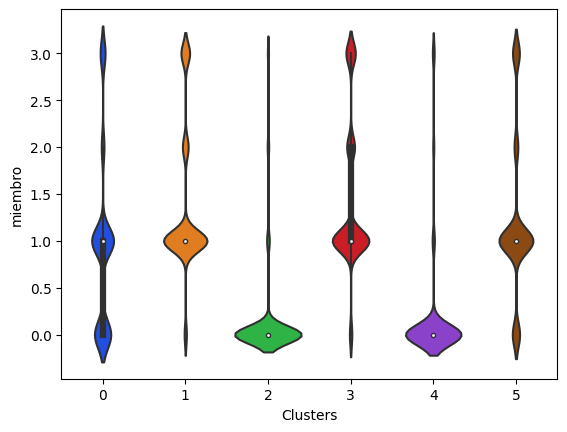

In [51]:
sns.violinplot(data=df_nuevo, y="miembro", x="Clusters", palette= "bright")

<Axes: xlabel='Clusters', ylabel='total_de_hijos'>

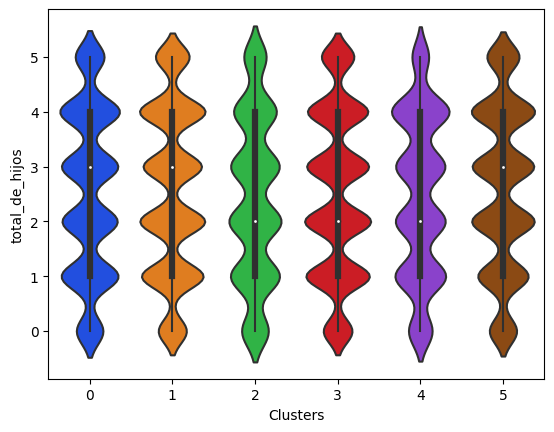

In [52]:
sns.violinplot(data=df_nuevo, x="Clusters", y= "total_de_hijos", palette= "bright")

<Axes: xlabel='Clusters', ylabel='escolaridad'>

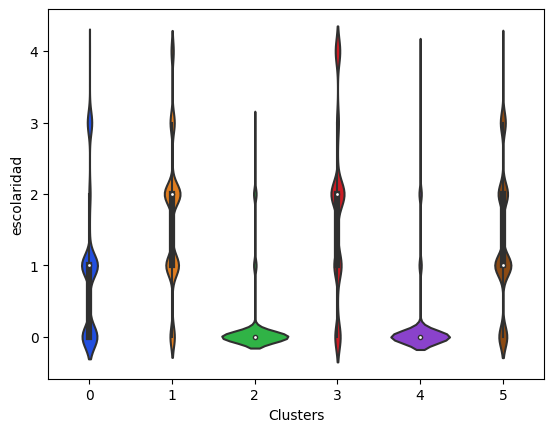

In [53]:
sns.violinplot(data=df_nuevo, x="Clusters", y= "escolaridad", palette= "bright")

(13.5, -0.5)

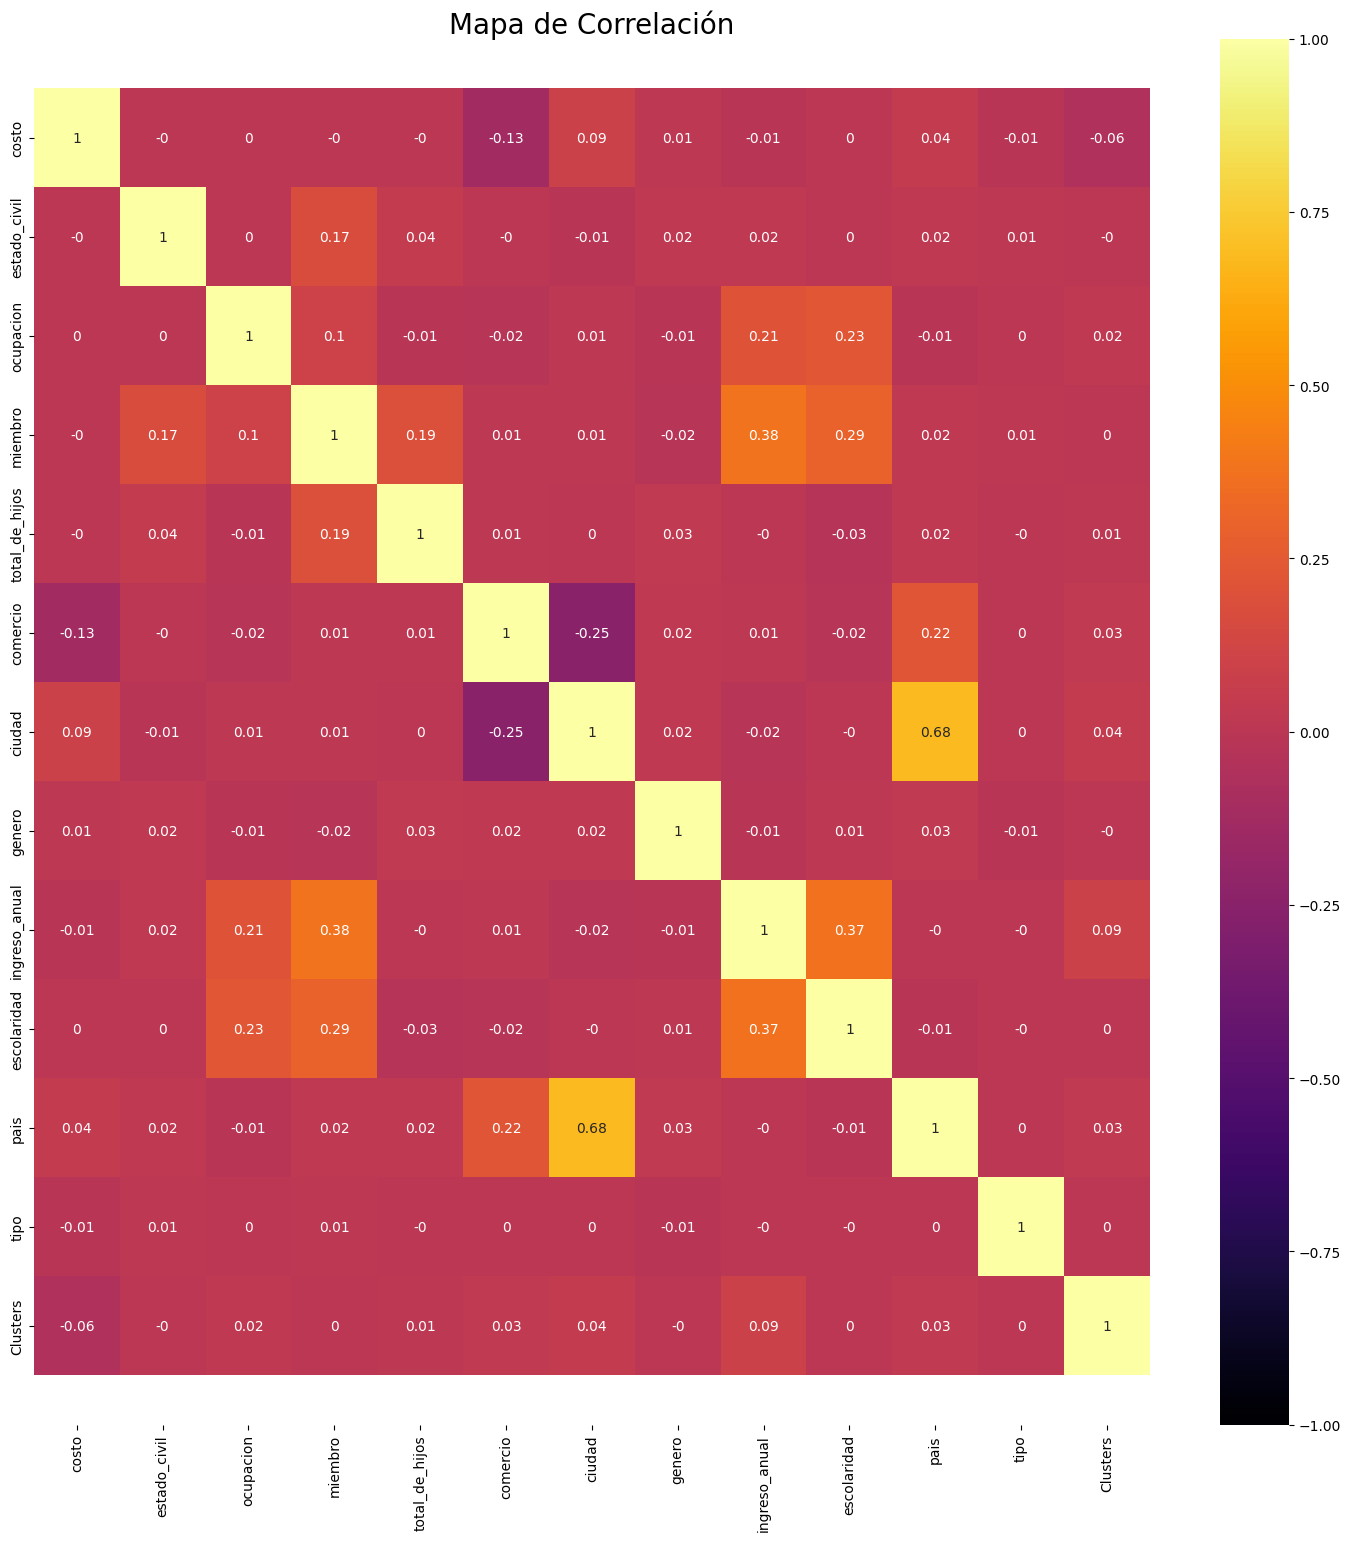

In [54]:
data_corr_final = df_nuevo.corr()
plt.figure(figsize=(18, 18))
heatmap = sns.heatmap(data_corr_final.round(2), vmin=-1, vmax=1, annot=True, cmap = "inferno")
heatmap.set_title('Mapa de Correlación', fontsize = 20, pad=1)


bottom, top = heatmap.get_ylim()
heatmap.set_ylim(bottom + 0.5, top - 0.5)

In [56]:
df_nuevo.groupby("Clusters").describe()

costo                                                         \
            count        mean        std     min     25%     50%     75%   
Clusters                                                                   
0          9603.0  112.491441  32.082632   59.02   75.76  126.62  139.19   
1         15710.0   92.474483  29.064305   50.79   67.25   89.90  115.25   
2          4122.0  135.579888   8.509654  119.26  128.20  137.46  142.58   
3         15264.0   83.385394  26.281599   50.79   62.26   76.88   98.81   
4          4094.0  101.694069   9.789542   84.97   93.11  101.84  109.21   
5         11635.0  104.615930  26.209976   50.79   90.65  104.41  125.48   

                 estado_civil                                               \
             max        count      mean       std  min  25%  50%  75%  max   
Clusters                                                                     
0         149.75       9603.0  0.496095  0.500011  0.0  0.0  0.0  1.0  1.0   
1         149.75      15710.0  0.494526  0.499986  0.0  0.0  0.0  1.0  1.0   
2         149.75       4122.0  0.486172  0.499869  0.0  0.0  0.0  1.0  1.0   
3         149.75      15264.0  0.512317  0.499865  0.0  0.0  1.0  1.0  1.0   
4         118.36       4094.0  0.501221  0.500060  0.0  0.0  1.0  1.0  1.0   
5         149.75      11635.0  0.486807  0.499847  0.0  0.0  0.0  1.0  1.0   

         ocupacion                                               miembro  \
             count      mean       std  min  25%  50%  75%  max    count   
Clusters                                                                   
0           9603.0  1.112152  1.136040  0.0  0.0  1.0  2.0  4.0   9603.0   
1          15710.0  1.416486  1.064892  0.0  1.0  1.0  2.0  4.0  15710.0   
2           4122.0  0.982533  0.998998  0.0  0.0  1.0  2.0  3.0   4122.0   
3          15264.0  1.596764  0.931693  0.0  1.0  1.0  3.0  4.0  15264.0   
4           4094.0  0.924035  1.009771  0.0  0.0  0.0  2.0  4.0   4094.0   
5          11635.0  1.271594  1.125362  0.0  0.0  1.0  2.0  4.0  11635.0   

                                                      total_de_hijos  \
              mean       std  min  25%  50%  75%  max          count   
Clusters                                                               
0         0.917630  0.914477  0.0  0.0  1.0  1.0  3.0         9603.0   
1         1.346149  0.767092  0.0  1.0  1.0  1.0  3.0        15710.0   
2         0.122999  0.490294  0.0  0.0  0.0  0.0  3.0         4122.0   
3         1.431145  0.815304  0.0  1.0  1.0  2.0  3.0        15264.0   
4         0.156326  0.582326  0.0  0.0  0.0  0.0  3.0         4094.0   
5         1.196304  0.838191  0.0  1.0  1.0  1.0  3.0        11635.0   

                                                      comercio            \
              mean       std  min  25%  50%  75%  max    count      mean   
Clusters                                                                   
0         2.536499  1.497758  0.0  1.0  3.0  4.0  5.0   9603.0  2.644694   
1         2.553533  1.499814  0.0  1.0  3.0  4.0  5.0  15710.0  2.780840   
2         2.408297  1.489251  0.0  1.0  2.0  4.0  5.0   4122.0  2.587821   
3         2.508648  1.487832  0.0  1.0  2.0  4.0  5.0  15264.0  2.856984   
4         2.470689  1.448858  0.0  1.0  2.0  4.0  5.0   4094.0  2.655349   
5         2.604985  1.484332  0.0  1.0  3.0  4.0  5.0  11635.0  2.778169   

                                              ciudad                           \
               std  min  25%  50%  75%  max    count      mean       std  min   
Clusters                                                                        
0         1.116505  0.0  2.0  2.0  4.0  4.0   9603.0  6.299802  4.833683  0.0   
1         1.084513  0.0  2.0  2.0  4.0  4.0  15710.0  6.619351  4.857625  0.0   
2         1.146056  0.0  2.0  2.0  4.0  4.0   4122.0  6.914119  5.007047  0.0   
3         1.106075  0.0  2.0  3.0  4.0  4.0  15264.0  6.196803  4.873199  0.0   
4         1.147203  0.0  2.0  2.0  4.0

### Conclusiones de cada cluster

Cluster 0: 9599 observaciones - La mayoria son miembros de Bronce, seguido con algunos pocos de Oro. Sus ingresos anuales medios son de $33.000. El nivel de escolaridad maxima predominante es Superior

Cluster 1: 15275 observaciones - La mayoria son miembros de Bronce, seguido con algunos pocos de Oro. Sus ingresos anuales medios son de $105.000. El nivel de escolaridad maxima predominante es Secundario, con una leve cantidad extra a la media del total en Maestria

Cluster 2: 4307 observaciones - La gran mayoria no son miembros. Sus ingresos anuales medios son de $20.000. El nivel de escolaridad maxima predominante es Primaria

Cluster 3: 15699 observaciones - La mayoria son miembros de Bronce, seguido con algunos pocos de Oro. Sus ingresos anuales medios son de $60.000. El nivel de escolaridad maxima predominante es Secundaria

Cluster 4: 3913 observaciones - La gran mayoria no son miembros. Sus ingresos anuales medios son de $20.000. El nivel de escolaridad maxima predominante es Primaria

Cluster 5: 11635 observaciones - La mayoria son miembros de Bronce, seguido con algunos pocos de Oro. Sus ingresos anuales medios son de $43.000. El nivel de escolaridad maxima predominante es Superior